In [82]:
from experiment import Experiment
import numpy as np
from agent import Agent
from enviroment import Environment
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

from utils import map_vote, cal_result

In [50]:
candidates = ['c1','c2','c3','c4','c5']
voting_scheme = ['plurality', 'voting_for_two', 'anti_plurality', 'borda']
strategy = 'combination'
happiness_type = 'A'
# number_of_agents = 5
number_of_strategists = 1
trials = 30
agents_options = [3, 5, 10, 25, 50, 100]
candidates_options  = [2, 3, 4, 5, 10]
feature_type = ['delta_happiness_total',]


In [51]:
def create_candidate_list(number):
    # Create a list with "c" followed by the candidate number for each candidate
    return ["c" + str(i) for i in range(1, number + 1)]

# Testing the function with number=5
test_list = create_candidate_list(10)
test_list


['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10']

In [ ]:
# def absolute_total_happiness(initial_hap, final_hap):
#     difference_list = [abs(a - b) for a, b in zip(list1, list2)]
    

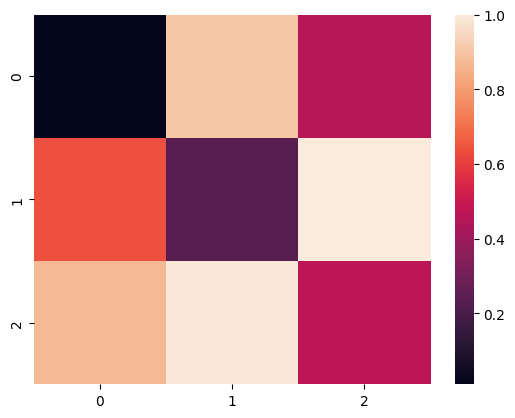

In [52]:
res = [[0.01, 0.9, 0.46], [0.64, 0.24, 1], [0.87, 0.99, 0.47]]
ax = sn.heatmap(res)

In [71]:
# def heatmap_experiment(agents_options, candidates_options, feature_type, voting_scheme, strategy, happiness_type):
#     feature_list_final = []
#     for a in agents_options:
#         feature_list = []
#         for c in candidates_options:

#             feature = 0

#             for trial in range(30):    
#                 print("#"*50)
#                 exp = Experiment(id=trial, name=f'{trial}th_experiment')

#                 # Set experiment variables
#                 exp.set_exp_variables(create_candidate_list(c), voting_scheme, strategy, happiness_type, a,  1)

#                 initial_happiness, final_happiness = exp.run_exp()

#                 if feature_type == 'delta_happiness_total':
#                     feature += abs(initial_happiness - final_happiness)
            
#             if feature_type == 'delta_happiness_total':
#                 feature /= a
                
#             feature /= 30

#             feature_list.append(feature)

#         feature_list_final.append(feature_list)

#     fig, ax = plt.subplots()
#     sn.heatmap(feature_list_final, annot=True, ax=ax)
#     # Setting the tick labels and labels for each axis
#     ax.set_xticklabels(candidates_options, rotation=0, fontsize=12)  # You can adjust rotation and fontsize as needed
#     ax.set_yticklabels(agents_options, rotation=0, fontsize=16)

#     # Setting labels for the axes
#     ax.set_xlabel("Number of candidates", fontsize=14)
#     ax.set_ylabel("Number of agents", fontsize=14)

#     plt.title(f"happiness_type={happiness_type}, voting_scheme={voting_scheme}, strategy={strategy}")
#     plt.yticks(rotation=0,fontsize=16)
#     plt.xticks(fontsize=12)
#     plt.tight_layout()
#     plt.show()

##################################################
exp_id: 0, exp_name: 0th_experiment
("[DEBUG]-[Env]- Agent: agent_0, strategic_agent: True, preference: ['c2', "
 "'c3', 'c1']\n")
[DEBUG]-[Env], votes: {'agent_0': [0, 2, 1], 'agent_1': [2, 1, 0], 'agent_2': [1, 2, 0]} 

Initial voting result Dict: {'c2': 5, 'c1': 3, 'c3': 1}
Initial Total Happiness: 2.334
[Debug]-[Exp]- init_total_happiness: 2.334
[Debug]-[set_vote]- hap_init: 0.667
[Debug]-[set_vote]- strategic_voted: False

[Debug]-[Env]- Best vote: [0 2 0] 
 Best pref: ['c2', 'c3', 'c1']
[DEBUG]-[Env], votes: {'agent_0': array([0, 2, 0]), 'agent_1': [2, 1, 0], 'agent_2': [1, 2, 0]} 

Final voting result Dict: {'c2': 5, 'c1': 3, 'c3': 0}
Final Total Happiness: 2.334
[Debug]-[Exp]- final_total_happiness: 2.334
##################################################
exp_id: 1, exp_name: 1th_experiment
("[DEBUG]-[Env]- Agent: agent_0, strategic_agent: True, preference: ['c2', "
 "'c3', 'c1']\n")
[DEBUG]-[Env], votes: {'agent_0': [0, 2, 1],

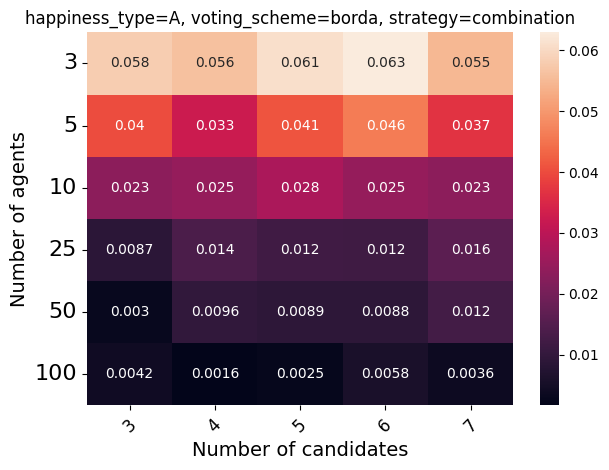

In [72]:
# agents_options = [3, 5, 10, 25, 50, 100]
# candidates_options  = [3, 4, 5, 6, 7]
# # agents_options = [3, 5]
# # candidates_options  = [2, 3]
# feature_type = ['delta_happiness_total',]
# heatmap_experiment(agents_options, candidates_options, feature_type[0], 'borda', 'combination', 'A')

In [80]:
def heatmap_experiment(agents_options, candidates_options, happiness_types, voting_schemes, strategy):
    fig, axs = plt.subplots(len(happiness_types), len(voting_schemes), figsize=(15, 10))
    
    feature_type = 'happiness'
    for i, happiness_type in enumerate(happiness_types):
        for j, voting_scheme in enumerate(voting_schemes):
            feature_list_final = []  # Reset for each subplot
            for a in agents_options:
                feature_list = []
                for c in candidates_options:
                    feature = 0
                    for trial in range(30):    
                        print("#"*50)
                        exp = Experiment(id=trial, name=f'{trial}th_experiment')

                        # Set experiment variables
                        exp.set_exp_variables(create_candidate_list(c), voting_scheme, strategy, happiness_type, a,  1)

                        initial_happiness, final_happiness = exp.run_exp()

                        if feature_type == 'happiness':
                            feature += abs(initial_happiness - final_happiness)
                    
                    if feature_type == 'happiness':
                        feature /= a
                        
                    feature /= 30

                    # feature /= (a * 30)
                    feature_list.append(feature)
                
                feature_list_final.append(feature_list)
            
            # Plotting each heatmap
            sn.heatmap(feature_list_final, annot=True, ax=axs[i, j], vmin=0, vmax=0.1)
            axs[i, j].set_title(f"{happiness_type}, {voting_scheme}")
            axs[i, j].set_xticklabels(candidates_options, rotation=0, fontsize=10)
            axs[i, j].set_yticklabels(agents_options, rotation=0, fontsize=10)
            if j == 0:
                axs[i, j].set_ylabel("Number of agents")
            if i == len(happiness_types) - 1:
                axs[i, j].set_xlabel("Number of candidates")
    
    plt.tight_layout()
    plt.show()

# # Example usage
# # This is a placeholder for your actual lists of options
# agents_options = [10, 20]
# candidates_options = [3, 4, 5]
# happiness_types = ["Happy", "Sad"]
# voting_schemes = ["Scheme1", "Scheme2"]
# strategy = "SomeStrategy"

# heatmap_experiment(agents_options, candidates_options, happiness_types, voting_schemes, strategy)


##################################################
exp_id: 0, exp_name: 0th_experiment
("[DEBUG]-[Env]- Agent: agent_0, strategic_agent: True, preference: ['c2', "
 "'c1', 'c3']\n")
[DEBUG]-[Env], votes: {'agent_0': array([0, 1, 0]), 'agent_1': array([1, 0, 0]), 'agent_2': array([0, 0, 1])} 

Initial voting result Dict: {'c1': 1, 'c2': 1, 'c3': 1}
Initial Total Happiness: 2.111
[Debug]-[Exp]- init_total_happiness: 2.111
[Debug]-[set_vote]- hap_init: 0.667
[Debug]-[set_vote]- strategic_voted: False

[Debug]-[Env]- Best vote: [0 1 0] 
 Best pref: ['c2', 'c1', 'c3']
[DEBUG]-[Env], votes: {'agent_0': array([0, 1, 0]), 'agent_1': array([1, 0, 0]), 'agent_2': array([0, 0, 1])} 

Final voting result Dict: {'c1': 1, 'c2': 1, 'c3': 1}
Final Total Happiness: 2.111
[Debug]-[Exp]- final_total_happiness: 2.111
##################################################
exp_id: 1, exp_name: 1th_experiment
("[DEBUG]-[Env]- Agent: agent_0, strategic_agent: True, preference: ['c3', "
 "'c2', 'c1']\n")
[DEBUG]-[

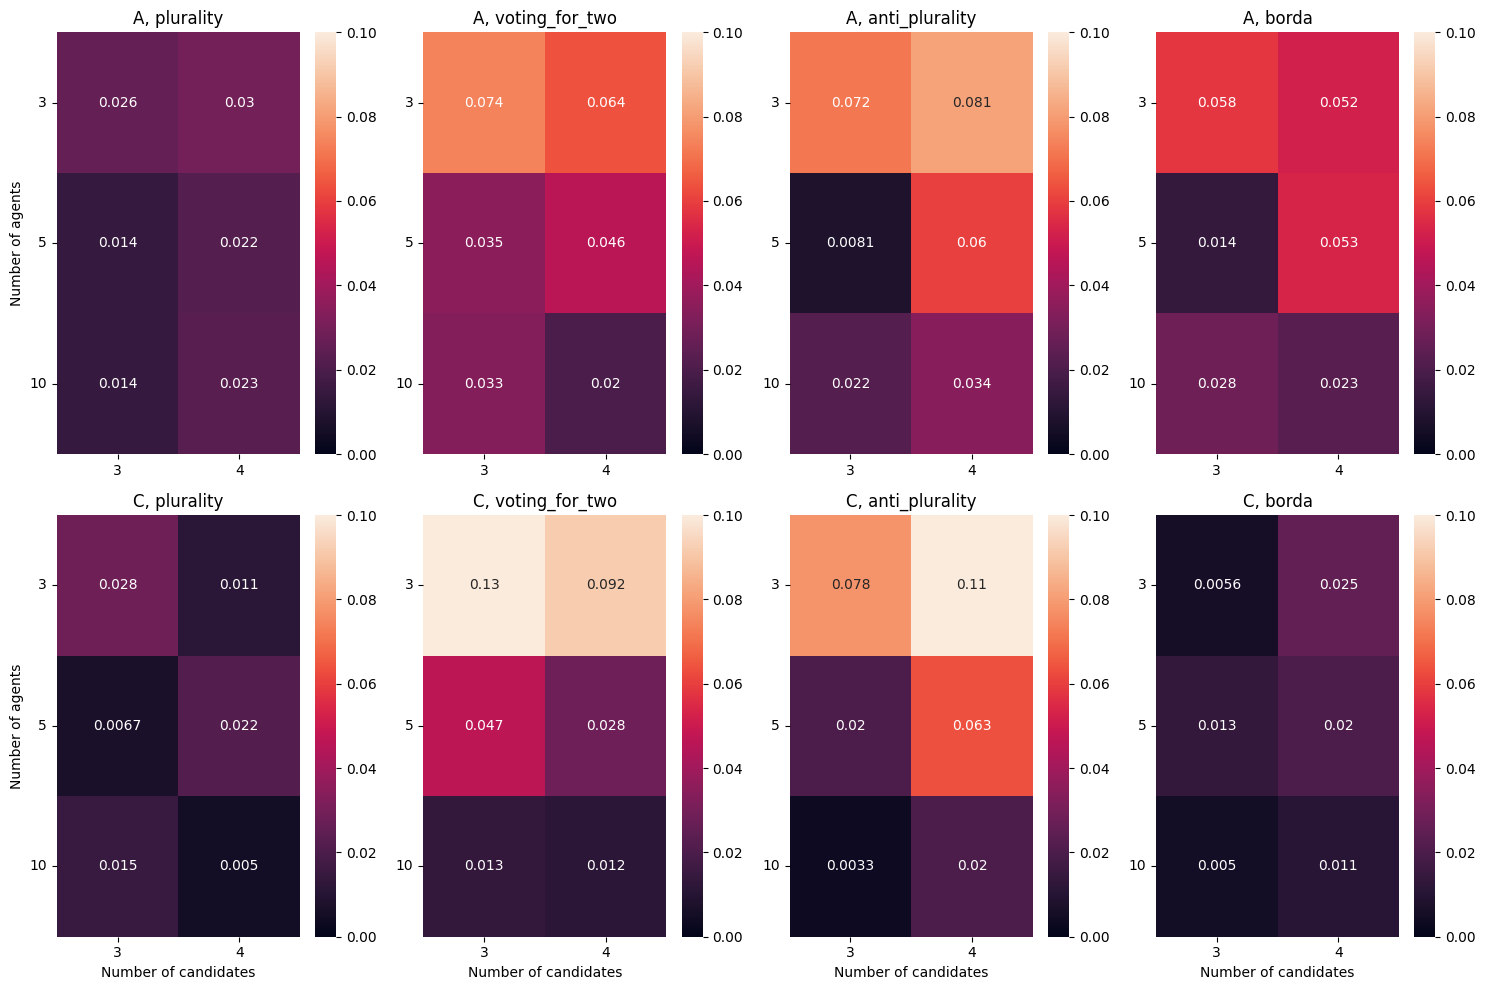

In [81]:
# agents_options = [3, 5, 10, 25, 50, 100]
# candidates_options  = [3, 4, 5, 6, 7]
# # agents_options = [3, 5]
# # candidates_options  = [2, 3]
# feature_type = ['delta_happiness_total',]
# This is a placeholder for your actual lists of options
agents_options = [3, 5, 10]
candidates_options = [3, 4]
voting_schemes = ['plurality', 'voting_for_two', 'anti_plurality', 'borda']
strategy = 'combination'
happiness_types = ['A','C']

heatmap_experiment(agents_options, candidates_options, happiness_types, voting_schemes, strategy)

In [ ]:
# PLACEHOLDER

def plot_strategic_voting_histograms(agents_options, candidates_options, happiness_types, voting_schemes, strategy):
    # Initialize an empty DataFrame to hold all experiment results
    all_data = pd.DataFrame(columns=['strategic_voters', 'feature_value', 'voting_scheme', 'happiness_type'])

    # Loop through all combinations of happiness types and voting schemes
    for happiness_type in happiness_types:
        for voting_scheme in voting_schemes:
            for a in agents_options:
                for c in candidates_options:
                    # Assuming a function 'run_experiment' that you define according to your experimental setup
                    # It should return the number of strategic voters and the feature value for each experiment run

                    
                    strategic_voters, feature_value = run_experiment(happiness_type, voting_scheme, a, c, strategy)

                    # Append the results to the DataFrame
                    all_data = pd.concat([all_data, pd.DataFrame({
                        'strategic_voters': [strategic_voters],
                        'feature_value': [feature_value],
                        'voting_scheme': [voting_scheme],
                        'happiness_type': [happiness_type]
                    })], ignore_index=True)

    # Setup the subplot grid
    fig, axs = plt.subplots(len(happiness_types), 1, figsize=(10, 5 * len(happiness_types)), squeeze=False)

    for i, happiness_type in enumerate(happiness_types):
        # Filter data for the current happiness type
        filtered_data = all_data[all_data['happiness_type'] == happiness_type]
        
        # Plotting
        sns.histplot(data=filtered_data, x='strategic_voters', hue='voting_scheme', multiple='stack',
                     bins=len(candidates_options) * len(agents_options),  # Adjust bins as necessary
                     kde=False, ax=axs[i, 0])
        
        axs[i, 0].set_title(f'Happiness Type: {happiness_type}')
        axs[i, 0].set_xlabel('Number of Strategic Voters')
        axs[i, 0].set_ylabel('Frequency')
        axs[i, 0].legend(title='Voting Scheme')

    plt.tight_layout()
    plt.show()

# Example placeholder for the experiment function
# Replace or modify this according to your actual experimental logic
def run_experiment(happiness_type, voting_scheme, agents, candidates, strategy):
    # Simulate running an experiment and return example data
    # You will replace this logic with your actual experiment execution
    strategic_voters = np.random.randint(1, 100)  # Simulated number of strategic voters
    feature_value = np.random.rand()  # Simulated feature value from the experiment
    return strategic_voters, feature_value


##################################################
exp_id: 5, exp_name: 5th_experiment
("[DEBUG]-[Env]- Agent: agent_0, strategic_agent: True, preference: ['c5', "
 "'c4', 'c2', 'c3', 'c1']\n")
[DEBUG]-[Env], votes: {'agent_0': array([0, 0, 0, 0, 1]), 'agent_1': array([0, 0, 0, 0, 1]), 'agent_2': array([0, 0, 0, 1, 0]), 'agent_3': array([0, 0, 0, 1, 0]), 'agent_4': array([0, 0, 0, 1, 0])} 

Initial voting result Dict: {'c4': 3, 'c5': 2, 'c1': 0, 'c2': 0, 'c3': 0}
Initial Total Happiness: 2.474
[Debug]-[Exp]- init_total_happiness: 2.474
[Debug]-[set_vote]- hap_init: 0.467
[Debug]-[set_vote]- strategic_voted: False

[Debug]-[Env]- Best vote: [0 0 0 0 1] 
 Best pref: ['c5', 'c4', 'c2', 'c3', 'c1']
[DEBUG]-[Env], votes: {'agent_0': array([0, 0, 0, 0, 1]), 'agent_1': array([0, 0, 0, 0, 1]), 'agent_2': array([0, 0, 0, 1, 0]), 'agent_3': array([0, 0, 0, 1, 0]), 'agent_4': array([0, 0, 0, 1, 0])} 

Final voting result Dict: {'c4': 3, 'c5': 2, 'c1': 0, 'c2': 0, 'c3': 0}
Final Total Happiness: 2

C:\Users\30698\AppData\Local\Temp\ipykernel_17480\3772735663.py:37: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend('topright', labels=voting_scheme)


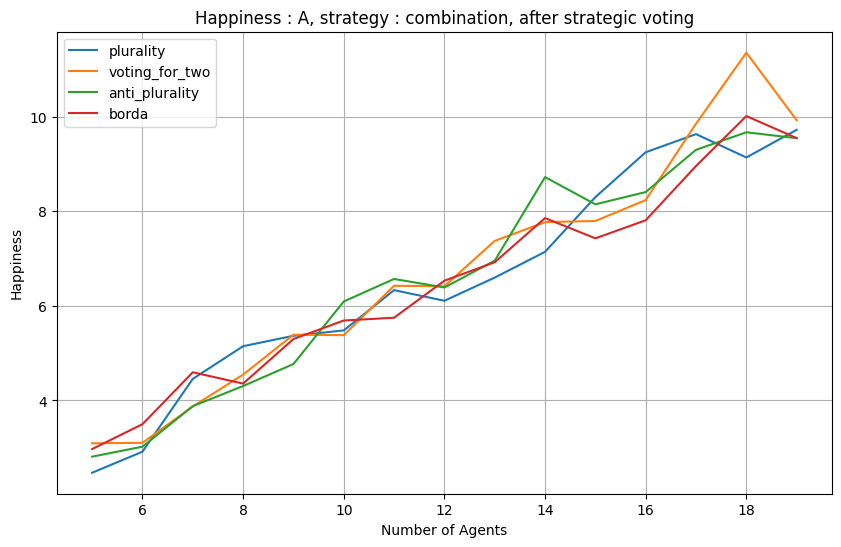

In [83]:
# ALL VOTING SCHEMES 

# initial_list = []
# final_list = []
initial_list_all_schemes = []
final_list_all_schemes = []

for scheme in voting_scheme:
    initial_list = []
    final_list = []
    for i in range(5,20):
        print("#"*50)
        exp = Experiment(id=i, name=f'{i}th_experiment')

        # Set experiment variables
        exp.set_exp_variables(candidates, scheme, strategy, happiness_type, i,  number_of_strategists)

        initial_happiness, final_happiness = exp.run_exp()

        initial_list.append(initial_happiness)
        final_list.append(final_happiness)

    initial_list_all_schemes.append(initial_list)
    final_list_all_schemes.append(final_list)

# Generate x values from 1 up to the number of values
x = np.arange(5, len(initial_list) + 5)
print(x)
plt.figure(figsize=(10, 6))  # Optional: Specifies the figure size
plt.title(f'Happiness : {happiness_type}, strategy : {strategy}, after strategic voting')  # Add a title

for strat in range(4):
    # plt.plot(x, initial_list_all_strats[strat])  # Plot the line with circle markers
    plt.plot(x, final_list_all_schemes[strat])  # Plot the line with circle markers

plt.xlabel('Number of Agents')  # Add an x-label
plt.ylabel('Happiness')  # Add a y-label
plt.grid(True)  # Add gridlines for better readability
plt.legend('topright', labels=voting_scheme)
plt.show()  # Display the plot


##################################################
exp_id: 5, exp_name: 5th_experiment
("[DEBUG]-[Env]- Agent: agent_0, strategic_agent: True, preference: ['c5', "
 "'c2', 'c1', 'c3', 'c4']\n")
[DEBUG]-[Env], votes: {'agent_0': [2, 3, 1, 0, 4], 'agent_1': [4, 3, 0, 1, 2], 'agent_2': [4, 2, 0, 3, 1], 'agent_3': [0, 3, 1, 4, 2], 'agent_4': [0, 4, 1, 3, 2]} 

Initial voting result Dict: {'c2': 15, 'c4': 11, 'c5': 11, 'c1': 10, 'c3': 3}
Initial Total Happiness: 3.051
[Debug]-[Exp]- init_total_happiness: 3.051
[Debug]-[set_vote]- hap_init: 0.417
[Debug]-[set_vote]- max_hap: 0.5, best_pref: ['c3', 'c5', 'c2', 'c4', 'c1'], best_vote: [0 0 4 0 0]

[Debug]-[set_vote]- max_hap: 0.59, best_pref: ['c4', 'c5', 'c1', 'c2', 'c3'], best_vote: [0 0 0 4 0]

[Debug]-[set_vote]- strategic_voted: True

[Debug]-[Env]- Best vote: [0 0 0 4 0] 
 Best pref: ['c4', 'c5', 'c1', 'c2', 'c3']
[DEBUG]-[Env], votes: {'agent_0': array([0, 0, 0, 4, 0]), 'agent_1': [4, 3, 0, 1, 2], 'agent_2': [4, 2, 0, 3, 1], 'agent_3': 

C:\Users\30698\AppData\Local\Temp\ipykernel_17480\4232285934.py:43: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend('topright', labels=['initial', 'final'])


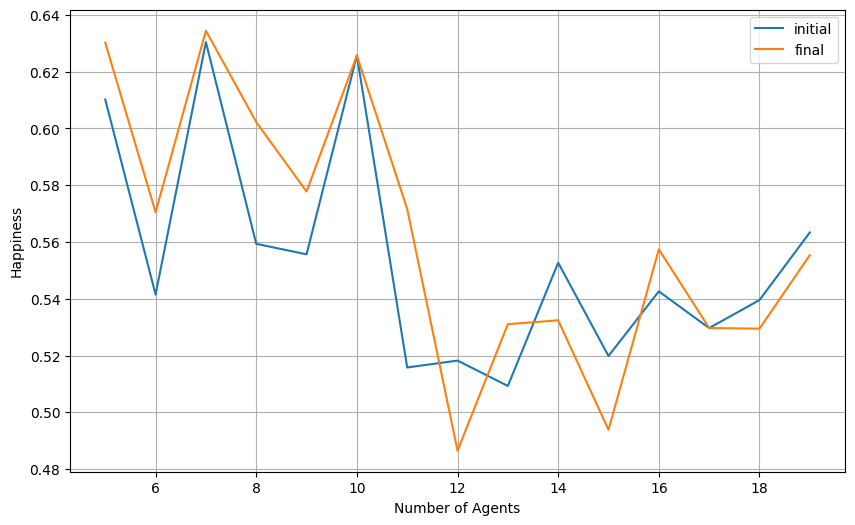

In [32]:
# INITIAL VS FINAL (NORMALIZED)

initial_list = []
final_list = []

for i in range(5,20):
    print("#"*50)
    exp = Experiment(id=i, name=f'{i}th_experiment')

    # Set experiment variables
    exp.set_exp_variables(candidates, 'borda', strategy, happiness_type, i,  number_of_strategists)

    initial_happiness, final_happiness = exp.run_exp()
    initial_list.append(initial_happiness)
    final_list.append(final_happiness)

average_initial = np.array(initial_list)/np.arange(5,20)
average_final = np.array(final_list)/np.arange(5,20)

# # Generate x values from 1 up to the number of values
# x = np.arange(5, len(initial_list)+5)

# plt.figure(figsize=(10, 6))  # Optional: Specifies the figure size
# plt.plot(x, initial_list)  # Plot the line with circle markers
# plt.plot(x, final_list)  # Plot the line with circle markers

# plt.title('')  # Add a title
# plt.xlabel('Number of Agents')  # Add an x-label
# plt.ylabel('Happiness')  # Add a y-label
# plt.grid(True)  # Add gridlines for better readability
# plt.legend('topright', labels=['initial', 'final'])
# plt.show()  # Display the plot

# Generate x values from 1 up to the number of values
x = np.arange(5, len(initial_list)+5)

plt.figure(figsize=(10, 6))  # Optional: Specifies the figure size
plt.plot(x, average_initial)  # Plot the line with circle markers
plt.plot(x,average_final)  # Plot the line with circle markers

plt.title('')  # Add a title
plt.xlabel('Number of Agents')  # Add an x-label
plt.ylabel('Happiness')  # Add a y-label
plt.grid(True)  # Add gridlines for better readability
plt.legend('topright', labels=['initial', 'final'])
plt.show()  # Display the plot